In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models.s8 import SkipNet
from utils import build_cifar, Trainer, plot_sampledata, plot_misclassified

# Load Data

In [3]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091),
            (0.24703223, 0.24348513, 0.26158784),
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:02<00:00, 73438701.74it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


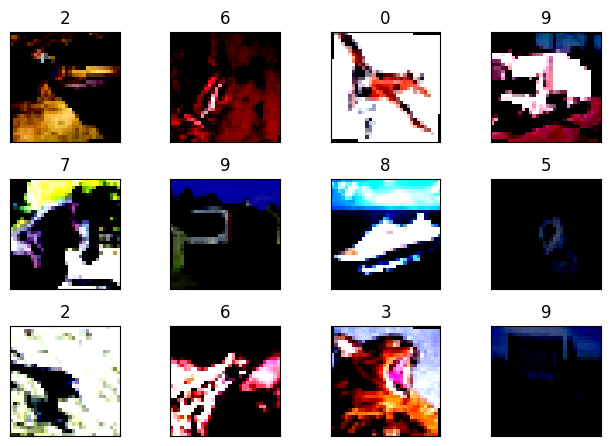

In [4]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = SkipNet(norm="bn").to(device)

In [7]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
SkipNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─BatchNorm2d: 2-3                  [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─BatchNorm2d: 2-7                  [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [8]:
num_epochs = 20
model = SkipNet(drop=0.01, norm="bn").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.1, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.9594 Batch_id=781 Accuracy=34.60: 100%|██████████| 782/782 [00:52<00:00, 15.02it/s]


Test set: Average loss: 1.8281, Accuracy: 3561/10000 (35.61%)

Epoch 2


Train: Loss=1.0615 Batch_id=781 Accuracy=48.53: 100%|██████████| 782/782 [00:50<00:00, 15.37it/s]


Test set: Average loss: 1.3948, Accuracy: 4901/10000 (49.01%)

Epoch 3


Train: Loss=1.0727 Batch_id=781 Accuracy=54.90: 100%|██████████| 782/782 [00:51<00:00, 15.14it/s]


Test set: Average loss: 1.3102, Accuracy: 5410/10000 (54.10%)

Epoch 4


Train: Loss=1.3266 Batch_id=781 Accuracy=58.66: 100%|██████████| 782/782 [00:50<00:00, 15.43it/s]


Test set: Average loss: 1.1397, Accuracy: 5960/10000 (59.60%)

Epoch 5


Train: Loss=0.7812 Batch_id=781 Accuracy=61.49: 100%|██████████| 782/782 [00:51<00:00, 15.30it/s]


Test set: Average loss: 1.0183, Accuracy: 6373/10000 (63.73%)

Epoch 6


Train: Loss=1.6607 Batch_id=781 Accuracy=63.84: 100%|██████████| 782/782 [00:51<00:00, 15.15it/s]


Test set: Average loss: 0.9511, Accuracy: 6644/10000 (66.44%)

Epoch 7


Train: Loss=1.6556 Batch_id=781 Accuracy=65.53: 100%|██████████| 782/782 [00:53<00:00, 14.68it/s]


Test set: Average loss: 0.9545, Accuracy: 6661/10000 (66.61%)

Epoch 8


Train: Loss=1.3919 Batch_id=781 Accuracy=66.90: 100%|██████████| 782/782 [00:51<00:00, 15.09it/s]


Test set: Average loss: 0.8384, Accuracy: 7118/10000 (71.18%)

Epoch 9


Train: Loss=0.8522 Batch_id=781 Accuracy=68.13: 100%|██████████| 782/782 [00:51<00:00, 15.14it/s]


Test set: Average loss: 0.8957, Accuracy: 6970/10000 (69.70%)

Epoch 10


Train: Loss=1.0515 Batch_id=781 Accuracy=69.19: 100%|██████████| 782/782 [00:53<00:00, 14.73it/s]


Test set: Average loss: 0.9509, Accuracy: 6713/10000 (67.13%)

Epoch 11


Train: Loss=0.6699 Batch_id=781 Accuracy=69.99: 100%|██████████| 782/782 [00:51<00:00, 15.09it/s]


Test set: Average loss: 0.8420, Accuracy: 7081/10000 (70.81%)

Epoch 12


Train: Loss=1.1359 Batch_id=781 Accuracy=70.76: 100%|██████████| 782/782 [00:51<00:00, 15.17it/s]


Test set: Average loss: 0.8259, Accuracy: 7163/10000 (71.63%)

Epoch 13


Train: Loss=0.7729 Batch_id=781 Accuracy=71.29: 100%|██████████| 782/782 [00:52<00:00, 14.87it/s]


Test set: Average loss: 0.7839, Accuracy: 7284/10000 (72.84%)

Epoch 14


Train: Loss=0.4906 Batch_id=781 Accuracy=71.94: 100%|██████████| 782/782 [00:50<00:00, 15.36it/s]


Test set: Average loss: 0.8000, Accuracy: 7197/10000 (71.97%)

Epoch 15


Train: Loss=0.6996 Batch_id=781 Accuracy=72.64: 100%|██████████| 782/782 [00:51<00:00, 15.14it/s]


Test set: Average loss: 0.8318, Accuracy: 7104/10000 (71.04%)

Epoch 16


Train: Loss=1.1048 Batch_id=781 Accuracy=73.40: 100%|██████████| 782/782 [00:52<00:00, 14.76it/s]


Test set: Average loss: 0.7209, Accuracy: 7483/10000 (74.83%)

Epoch 17


Train: Loss=0.5185 Batch_id=781 Accuracy=73.88: 100%|██████████| 782/782 [00:51<00:00, 15.17it/s]


Test set: Average loss: 0.6964, Accuracy: 7592/10000 (75.92%)

Epoch 18


Train: Loss=0.3648 Batch_id=781 Accuracy=74.52: 100%|██████████| 782/782 [00:51<00:00, 15.18it/s]


Test set: Average loss: 0.6889, Accuracy: 7642/10000 (76.42%)

Epoch 19


Train: Loss=0.8631 Batch_id=781 Accuracy=75.45: 100%|██████████| 782/782 [00:52<00:00, 14.88it/s]


Test set: Average loss: 0.6906, Accuracy: 7622/10000 (76.22%)

Epoch 20


Train: Loss=0.9258 Batch_id=781 Accuracy=75.42: 100%|██████████| 782/782 [00:51<00:00, 15.16it/s]


Test set: Average loss: 0.6830, Accuracy: 7640/10000 (76.40%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 75.45@19		75.42
test	 76.42@18		76.40


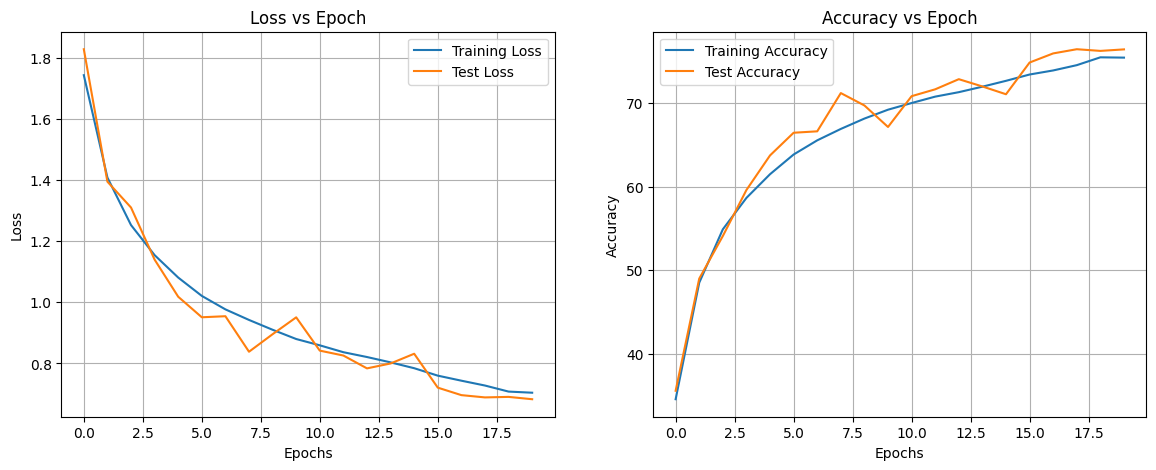

In [9]:
trainer.plot_history()

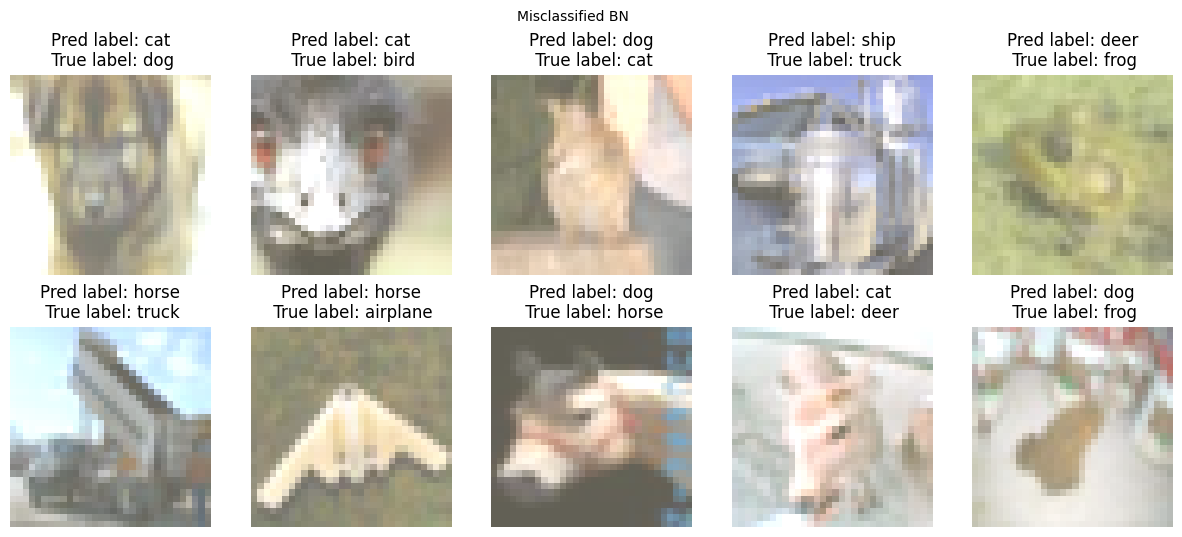

In [10]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)